# import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
import datetime

# EDA

# Load dataset

In [2]:
data=pd.read_csv("hotel_bookings.csv")
pd.set_option("display.max_columns",None)

# 1. data cleaning

### inforamtion about dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### missing_values(%)

In [5]:
per=data.isnull().sum()/len(data)*100
per

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

### Treating Missing values

In [6]:
def fill_miss_values():
    #imputing "Energy star score" separately to avoid duplicates
    for i in data:
        if per[i]>25:
            data.drop(i,inplace=True,axis=1)#removing columns greater than threshold(25)
        elif per[i]<25 and data[i].dtypes !="object":
            data[i]=data[i].fillna(data[i].median())#filling missing values with median
        else:
            data[i]=data[i].fillna(data[i].mode()[0])#filling missing object with mode
fill_miss_values()

    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
true_numeric_cols=["babies","children","lead_time","adr","stays_in_weekend_nights","stays_in_week_nights","days_in_waiting_list","total_of_special_requests","required_car_parking_spaces","agent","previous_cancellations","previous_bookings_not_canceled"]
true_categorical_cols=list(data.select_dtypes(exclude="number"))[:-1]+["is_repeated_guest","is_canceled"]

In [9]:
data["country"].value_counts()

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [10]:
data["country"].nunique()

177

In [11]:
data["prt"]=data["country"]=="PRT"
data["prt"]=data["prt"].astype(int)


In [12]:
data["prt"].nunique()

2

In [13]:
data["prt"].value_counts()

prt
0    70312
1    49078
Name: count, dtype: int64

In [14]:
data.drop(columns=["country"],inplace=True)

In [15]:
true_numeric_cols=["babies","children","lead_time","adr","stays_in_weekend_nights","stays_in_week_nights","days_in_waiting_list","total_of_special_requests","required_car_parking_spaces","agent","previous_cancellations","previous_bookings_not_canceled"]
true_categorical_cols=list(data.select_dtypes(exclude="number"))[:-1]+["is_repeated_guest","is_canceled","prt"][:-3]

In [16]:
true_categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

# univariate analysis

<Axes: xlabel='is_canceled', ylabel='count'>

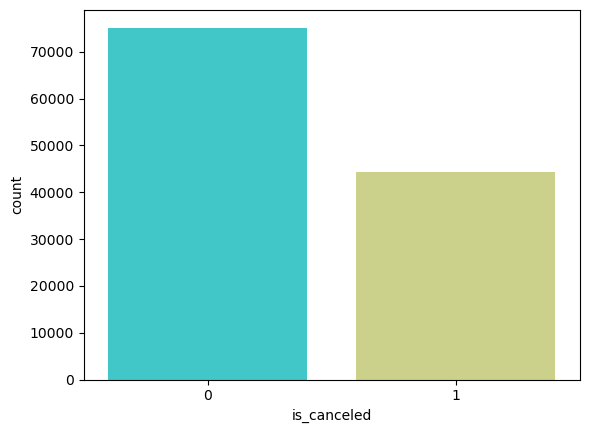

In [17]:
sns.countplot(x="is_canceled",data=data,palette="rainbow")

<Axes: xlabel='is_repeated_guest', ylabel='count'>

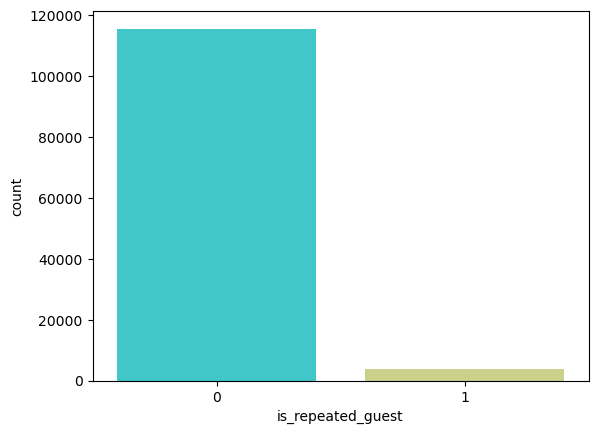

In [18]:
sns.countplot(x="is_repeated_guest",data=data,palette="rainbow")

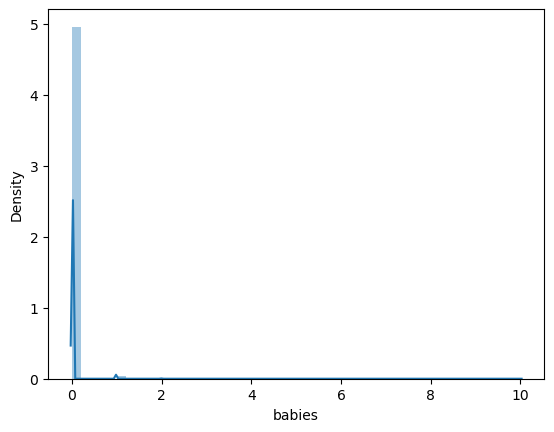

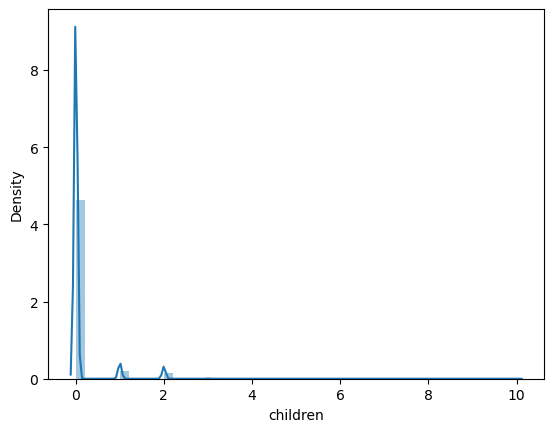

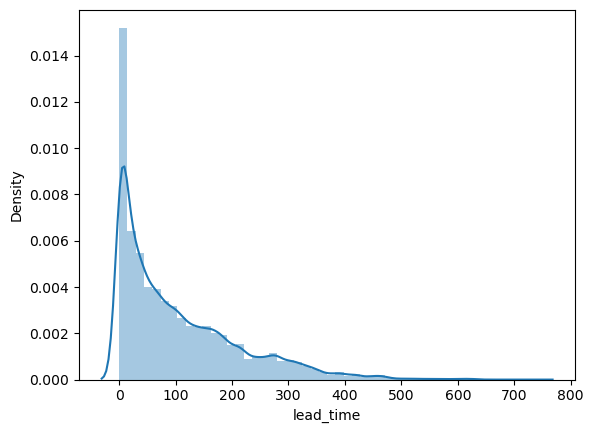

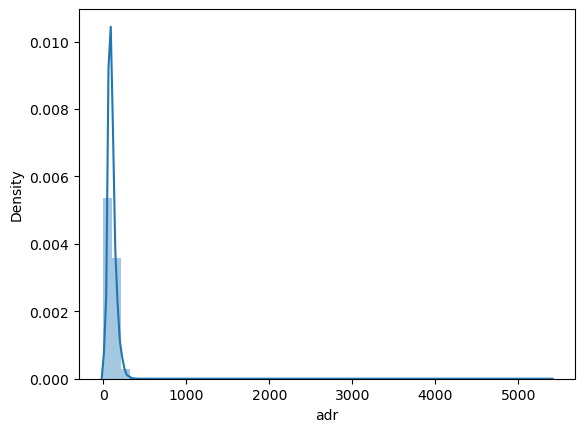

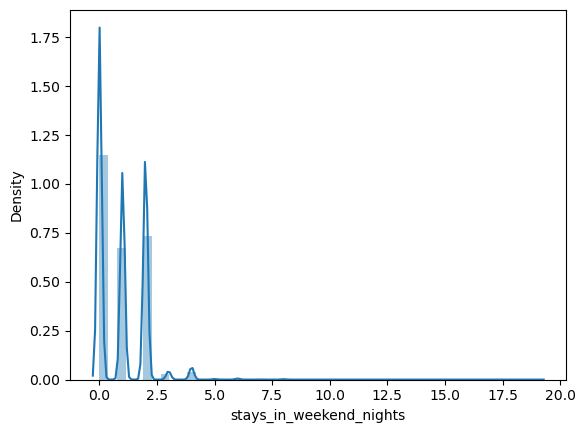

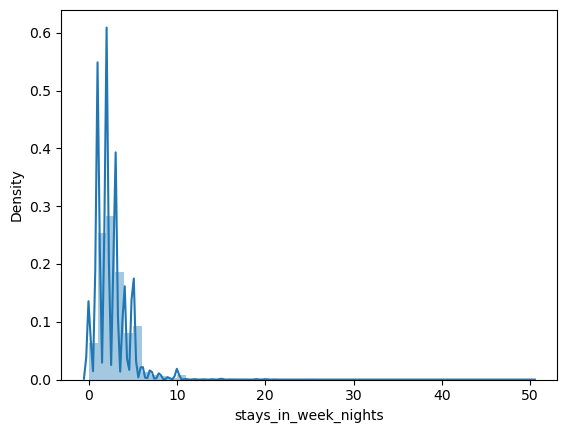

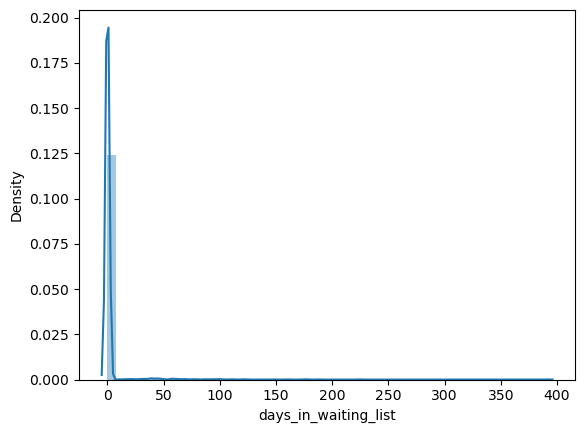

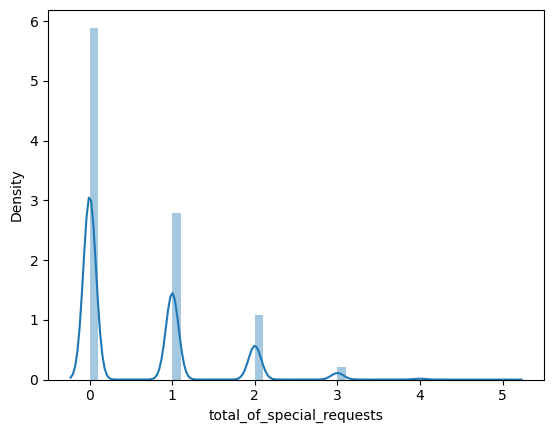

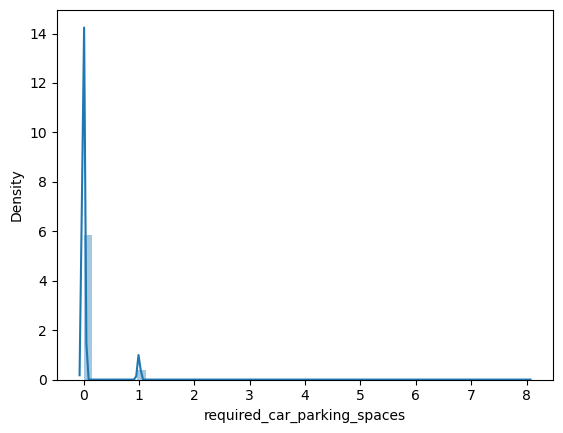

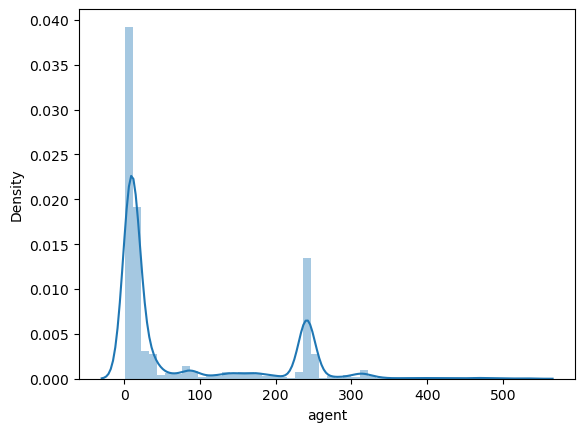

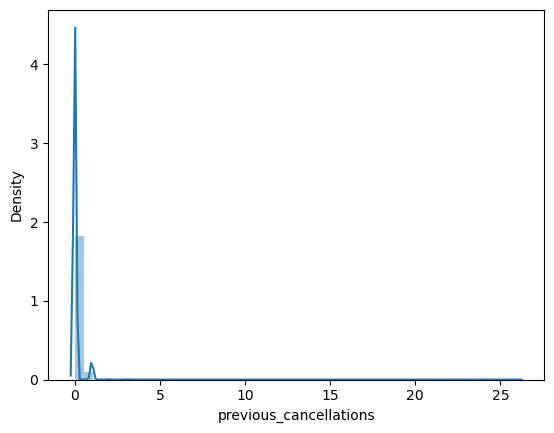

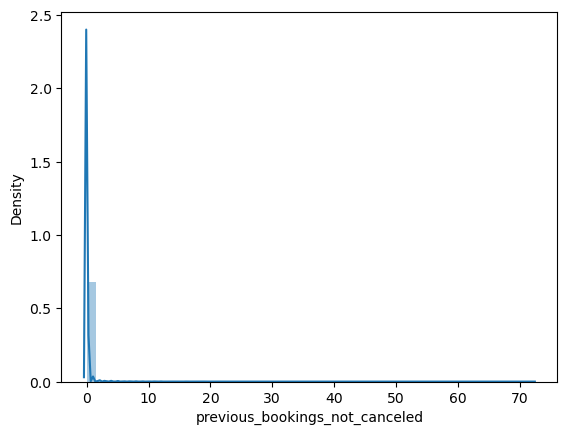

In [19]:
#interger cols
def histplot(col):
    sns.distplot(data[col])
    plt.show()
for i in true_numeric_cols:
    histplot(i)

In [20]:
# categorical variables

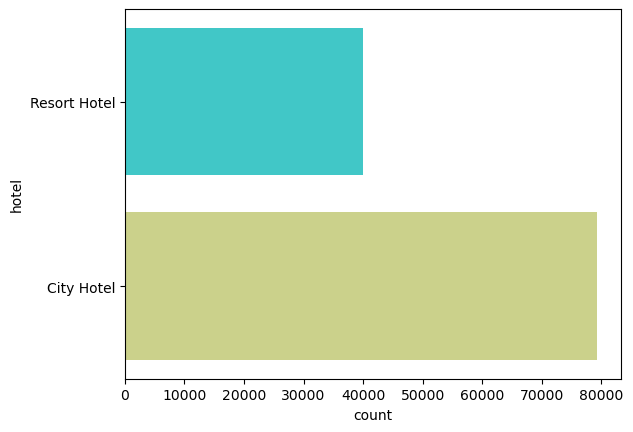

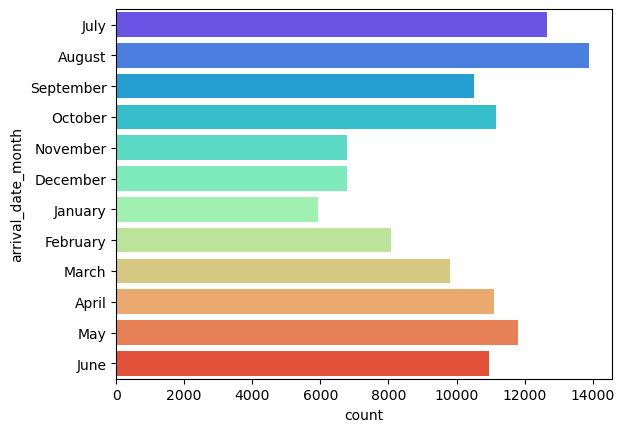

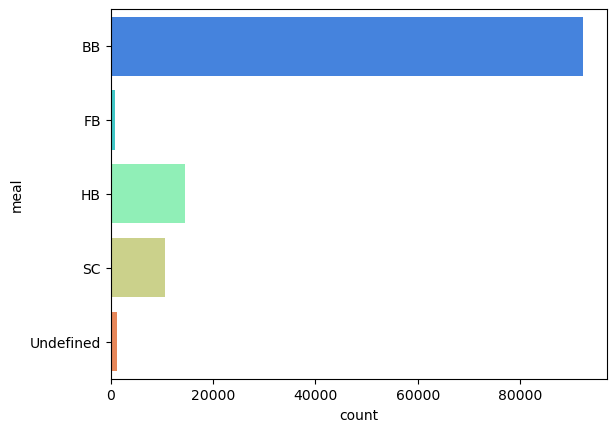

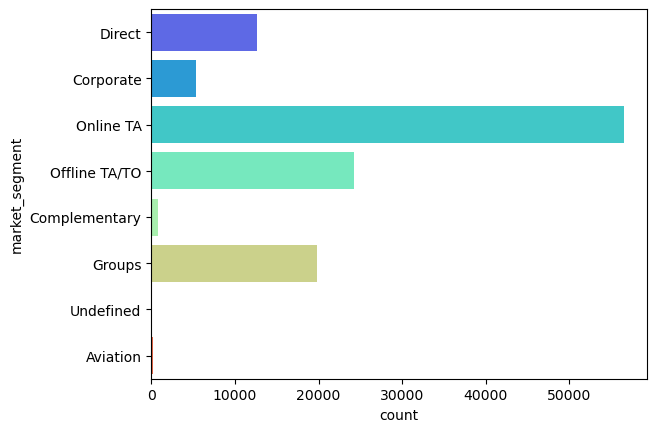

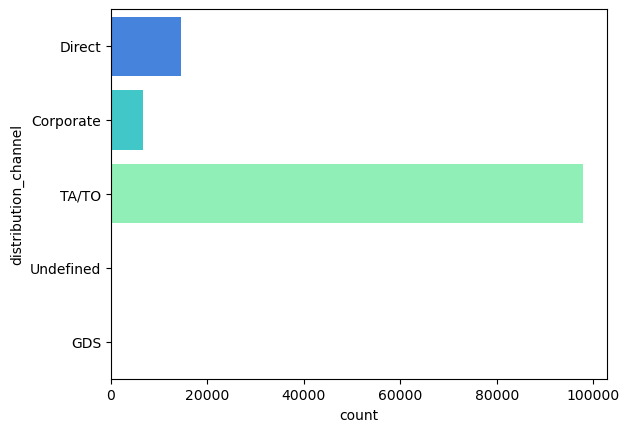

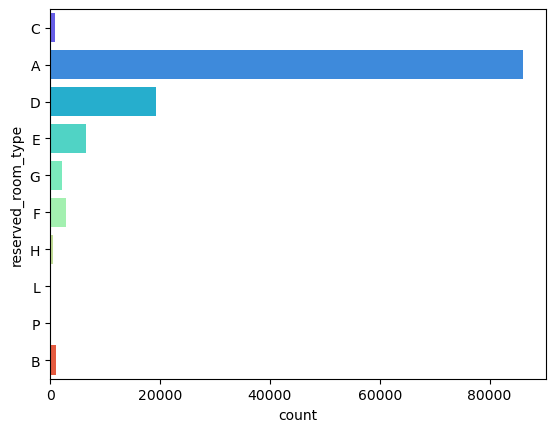

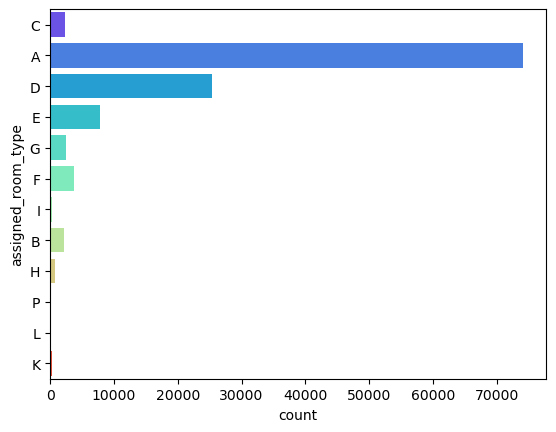

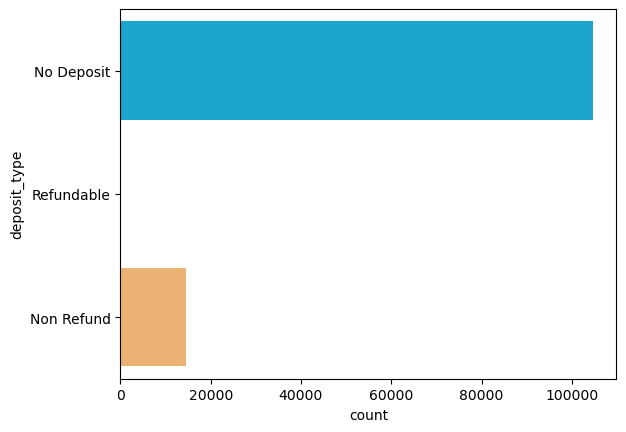

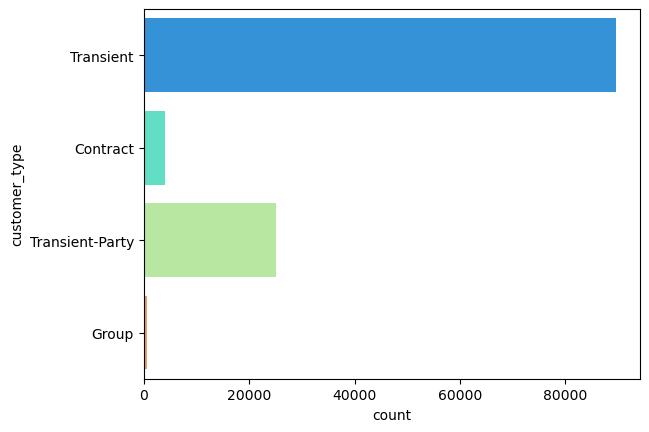

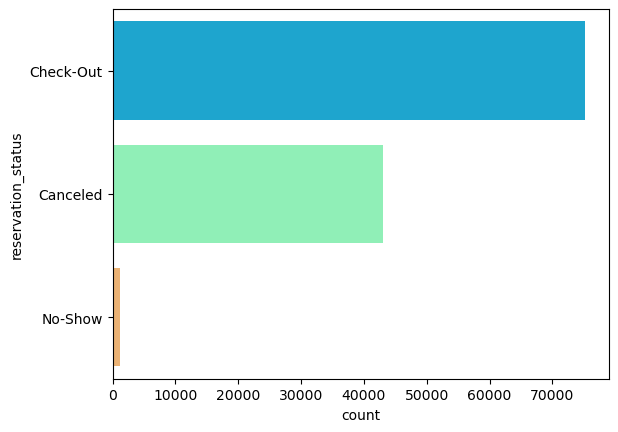

In [21]:
def countplot(col):
    sns.countplot(y=col,data=data,palette="rainbow")
    plt.show()
for i in true_categorical_cols:
    countplot(i)

# Bivariate analysis

In [22]:
# categorical variable with target variable

In [23]:
def bivariate(col):
    sns.countplot(y=col,hue="is_canceled",data=data)
    plt.show()

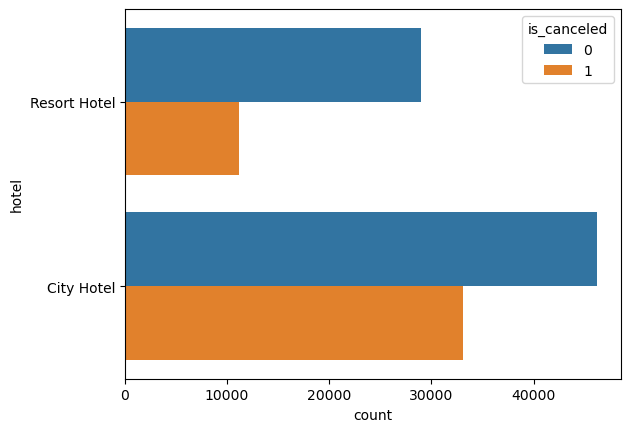

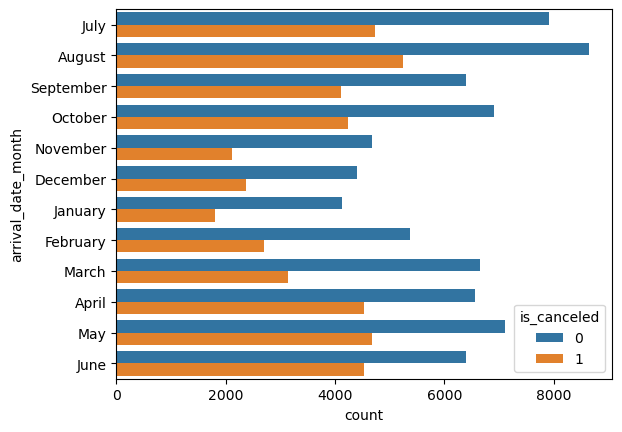

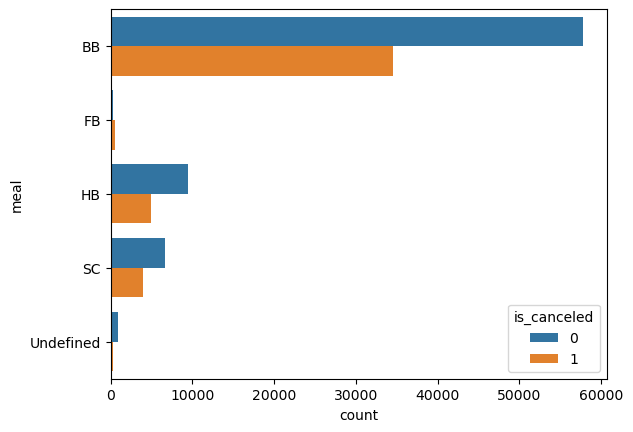

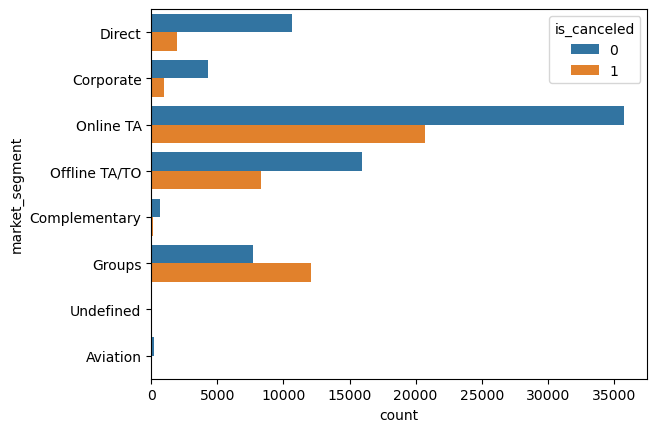

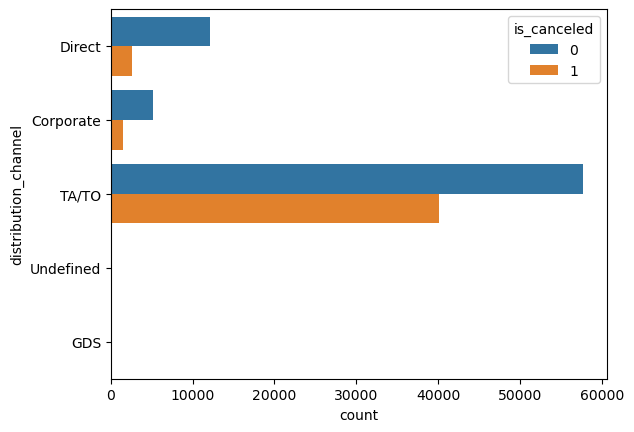

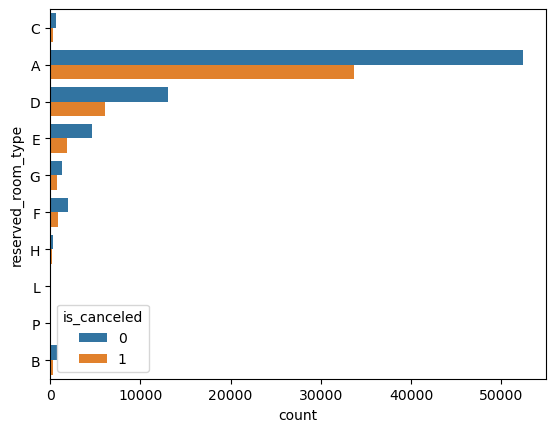

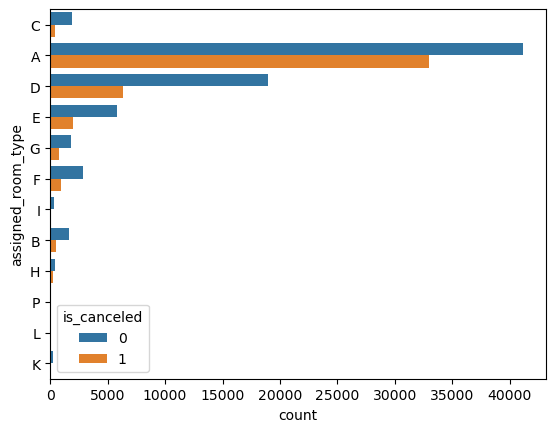

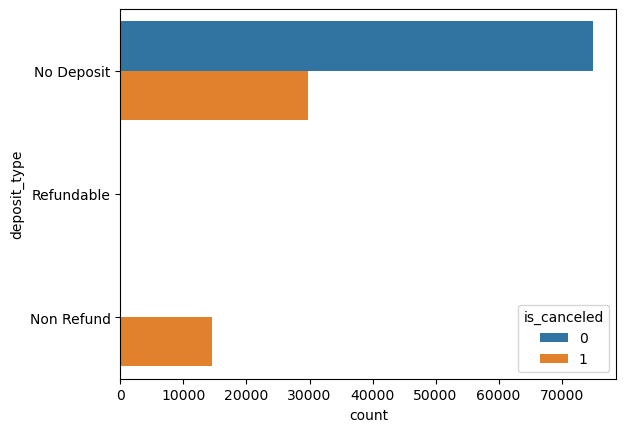

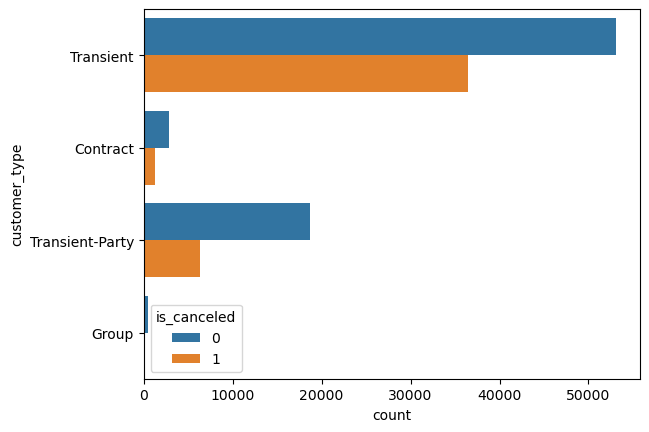

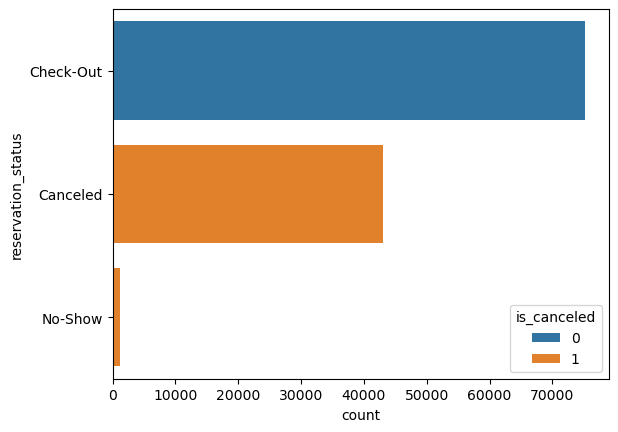

In [24]:
for i in true_categorical_cols:
    bivariate(i)

# feature enginering

In [25]:
category_drop_columns=["deposit_type","distribution_channel","reservation_status"]
#data["reservation_status"]=data["reservation_status"].replace("No-Show","Canceled")

In [26]:
data.drop(columns=category_drop_columns,inplace=True)

In [27]:
data["arrival_date_month"] = data["arrival_date_month"].apply(lambda x: datetime.datetime.strptime(x, '%B').month )


In [28]:
data["reservation_status_date_day"]=pd.to_datetime(data["reservation_status_date"]).dt.day

In [29]:
data["reservation_month"]=pd.to_datetime(data["reservation_status_date"]).dt.month
data["reservation_year"]=pd.to_datetime(data["reservation_status_date"]).dt.year

In [30]:
from datetime import date
 
 
def numOfDays(cols):
    year_1=cols[0]
    mon_1=cols[1]
    day_1=cols[2]
    year_2=cols[3]
    mon_2=cols[4]
    day_2=cols[5]
    date1=date(year_1,mon_1,day_1)
    date2=date(year_2,mon_2,day_2)
    return np.abs(date1-date2).days
 
 
# Driver program
data["days_blw_arrival&reservation"]=data[["arrival_date_year","arrival_date_month","arrival_date_day_of_month","reservation_year","reservation_month","reservation_status_date_day"]].apply(numOfDays,axis=1)

In [31]:
data.drop(columns=["reservation_status_date","arrival_date_year","arrival_date_month","arrival_date_day_of_month","reservation_year","reservation_month","reservation_status_date_day"],inplace=True)

In [32]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,prt,days_blw_arrival&reservation
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,Offline TA/TO,0,0,0,A,A,0,394.0,0,Transient,96.14,0,0,0,7
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,Online TA,0,0,0,E,E,0,9.0,0,Transient,225.43,0,2,0,7
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,Online TA,0,0,0,D,D,0,9.0,0,Transient,157.71,0,4,0,7
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,Online TA,0,0,0,A,A,0,89.0,0,Transient,104.40,0,0,0,7
119389,City Hotel,0,205,35,2,7,2,0.0,0,HB,Online TA,0,0,0,A,A,0,9.0,0,Transient,151.20,0,2,0,9


In [33]:
"""data.drop(columns=["reservation_status"],inplace=True)
from datetime import date
 
 
def numOfDays(date1, date2):
  #check which date is greater to avoid days output in -ve number
    if date2 > date1:   
        return (date2-date1).days
    else:
        return (date1-date2).days
 
"""

'data.drop(columns=["reservation_status"],inplace=True)\nfrom datetime import date\n \n \ndef numOfDays(date1, date2):\n  #check which date is greater to avoid days output in -ve number\n    if date2 > date1:   \n        return (date2-date1).days\n    else:\n        return (date1-date2).days\n \n'

# Summary

In [34]:
data.describe(exclude="number")

,hotel,meal,market_segment,reserved_room_type,assigned_room_type,customer_type
count,119390,119390,119390,119390,119390,119390
unique,2,5,8,10,12,4
top,City Hotel,BB,Online TA,A,A,Transient
freq,79330,92310,56477,85994,74053,89613


In [35]:
data.describe(exclude="object")

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,prt,days_blw_arrival&reservation
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363,0.411073,33.946109
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798,0.492030,68.102234
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,1.000000,26.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,1.000000,526.000000


# Encoding

In [36]:
#data.drop(columns=["reservation_status_date"],inplace=True)

In [37]:
l=[]
for i in data.select_dtypes(exclude="number"):
    l.append(i)

In [38]:
data=pd.get_dummies(columns=l,dtype=int,drop_first=True,data=data)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119390 non-null  float64
 7   babies                          119390 non-null  int64  
 8   is_repeated_guest               119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  agent           

# train_test_split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X=data.drop(columns=["is_canceled","arrival_date_week_number"])
y=data["is_canceled"]

#X_smote,y_smote=smote.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
#X_smote.shape

# Model training

### Model training with single algo

In [43]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [44]:
test_preds=lr.predict(X_test)
train_preds=lr.predict(X_train)

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
lr_m=LogisticRegression(max_iter=500)
navi_classifer=GaussianNB()
random=RandomForestClassifier()
dt_m=DecisionTreeClassifier()
Voting_clf=VotingClassifier(estimators=[("navieBayesTheorem",navi_classifer),("LR",lr_m),("dt_m",dt_m),("random",random)],verbose=True)
Voting_clf.fit(X_train,y_train)


[Voting] ........ (1 of 4) Processing navieBayesTheorem, total=   0.1s
[Voting] ....................... (2 of 4) Processing LR, total=   6.4s
[Voting] ..................... (3 of 4) Processing dt_m, total=   0.9s
[Voting] ................... (4 of 4) Processing random, total=  12.4s


VotingClassifier(estimators=[('navieBayesTheorem', GaussianNB()),
                             ('LR', LogisticRegression(max_iter=500)),
                             ('dt_m', DecisionTreeClassifier()),
                             ('random', RandomForestClassifier())],
                 verbose=True)

In [46]:
final_predict=Voting_clf.predict(X_test)
train_preds=Voting_clf.predict(X_train)

In [47]:
metrics.confusion_matrix(y_test,final_predict)

array([[22528,    22],
       [ 1005, 12262]], dtype=int64)

In [48]:
print(metrics.classification_report(y_test,final_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22550
           1       1.00      0.92      0.96     13267

    accuracy                           0.97     35817
   macro avg       0.98      0.96      0.97     35817
weighted avg       0.97      0.97      0.97     35817



In [49]:
print(metrics.classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     52616
           1       1.00      0.95      0.97     30957

    accuracy                           0.98     83573
   macro avg       0.98      0.97      0.98     83573
weighted avg       0.98      0.98      0.98     83573



# Model Evaluation

In [50]:
metrics.confusion_matrix(y_test,test_preds)

array([[22485,    65],
       [ 1762, 11505]], dtype=int64)

In [51]:
print(metrics.classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22550
           1       0.99      0.87      0.93     13267

    accuracy                           0.95     35817
   macro avg       0.96      0.93      0.94     35817
weighted avg       0.95      0.95      0.95     35817



In [52]:
print(metrics.classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     52616
           1       1.00      0.95      0.97     30957

    accuracy                           0.98     83573
   macro avg       0.98      0.97      0.98     83573
weighted avg       0.98      0.98      0.98     83573



In [53]:
# visualising heatmap

<Axes: >

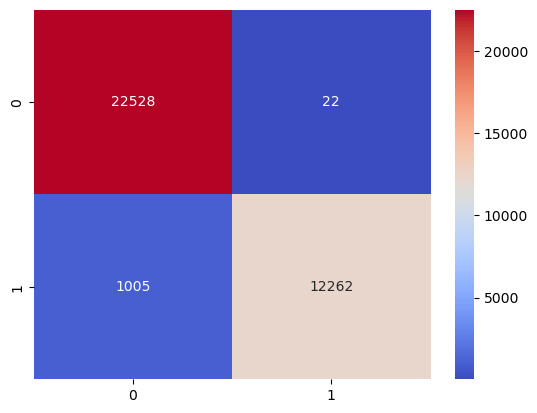

In [54]:
sns.heatmap(metrics.confusion_matrix(y_test,final_predict),annot=True,cmap="coolwarm",fmt=".0f")

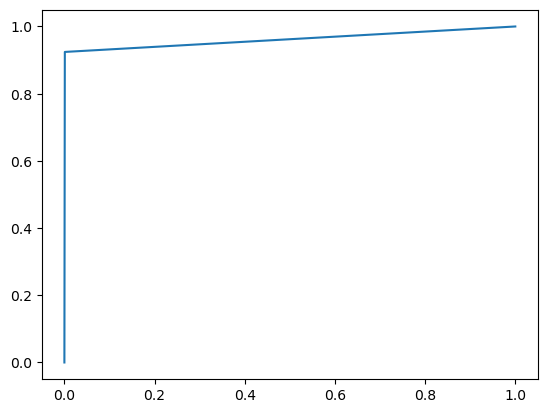

In [55]:
false_pos_rate,true_pos_rate,threshold=metrics.roc_curve(y_test,final_predict)

plt.plot(false_pos_rate,true_pos_rate)

In [56]:
metrics.auc(false_pos_rate,true_pos_rate)

0.9616362623564428